Kelompok 06

Anggota kelompok:

1. Ahmad Azrial Nubail
2. Priskila Destriani Banjarnahor
3. Rahma Hayuning Astuti

Kelas : UGM-04

Universitas Host : Universitas Gadjah Mada

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# import library for build model 
from keras.layers import Dense,Dropout,SimpleRNN,LSTM
from keras.models import Sequential

# import library untuk data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from datetime import datetime

In [ ]:
df=pd.read_csv('beras - Sheet1 (2).csv', parse_dates=['Date'], index_col=['Date'])
df

,Beras Kualitas Bawah,Beras Kualitas Medium,Beras Kualitas Super
Date,,,
2019-02-01,10800,11900,13150
2019-03-01,10800,11900,13150
2019-04-01,10800,11900,13150
2019-07-01,10800,11950,13150
2019-08-01,10850,11950,13150
...,...,...,...
2021-06-12,10650,11700,12950
2021-07-12,10650,11700,12950
2021-08-12,10650,11700,12950


In [ ]:
df.describe()

,Beras Kualitas Bawah,Beras Kualitas Medium,Beras Kualitas Super
count,724.000000,724.000000,724.000000
mean,10743.922652,11826.657459,13080.732044
std,112.517155,106.921663,86.171947
min,10550.000000,11400.000000,12650.000000
25%,10650.000000,11750.000000,13050.000000
50%,10750.000000,11800.000000,13100.000000
75%,10800.000000,11850.000000,13150.000000
max,12500.000000,13250.000000,14000.000000


In [ ]:
df.isna().sum()

Beras Kualitas Bawah     0
Beras Kualitas Medium    0
Beras Kualitas Super     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 724 entries, 2019-02-01 to 2021-10-12
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Beras Kualitas Bawah   724 non-null    int64
 1   Beras Kualitas Medium  724 non-null    int64
 2   Beras Kualitas Super   724 non-null    int64
dtypes: int64(3)
memory usage: 22.6 KB


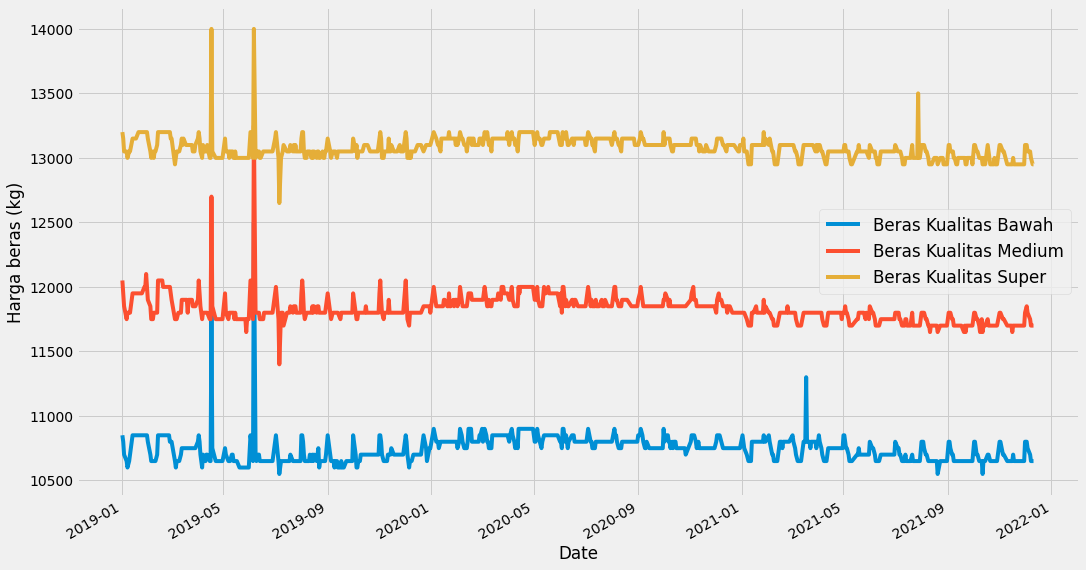

In [ ]:
df.plot(figsize=(16, 10))
plt.legend(fontsize="large")
plt.xlabel("Date")
plt.ylabel("Harga beras (kg)");

In [ ]:
# Kolom 'low' yang akan kita gunakan dalam membangun model
# Slice kolom 'low' 

Low_data = df.iloc[:,0:1].values

In [ ]:
# cek output low_data
Low_data  

array([[10800],
       [10800],
       [10800],
       [10800],
       [10850],
       [10850],
       [10850],
       [10850],
       [10850],
       [10850],
       [10850],
       [10850],
       [10850],
       [10850],
       [10850],
       [10850],
       [10850],
       [10850],
       [10850],
       [10850],
       [10850],
       [10850],
       [10850],
       [10850],
       [10850],
       [10850],
       [10850],
       [10850],
       [10850],
       [10850],
       [10850],
       [10850],
       [10850],
       [10850],
       [10850],
       [10850],
       [10850],
       [10850],
       [10850],
       [10800],
       [10800],
       [10800],
       [10800],
       [10750],
       [10800],
       [10800],
       [10800],
       [10800],
       [10750],
       [10750],
       [10750],
       [10750],
       [10750],
       [10750],
       [10750],
       [10750],
       [10750],
       [10750],
       [10750],
       [10750],
       [10750],
       [10700],
       [

###  Data Preprocessing

In [ ]:
# Menskalakan data antara 1 dan 0 (scaling) pada low data

scaler = MinMaxScaler(feature_range=(0,1))      

In [ ]:
# definisikan variabel step dan train 

Low_scaled = scaler.fit_transform(Low_data)                    

step_size = 21                    

train_x = []
train_y = []

In [ ]:
# membuat fitur dan lists label

for i in range(step_size,723):                
    train_x.append(Low_scaled[i-step_size:i,0])
    train_y.append(Low_scaled[i,0])

In [ ]:
# mengonversi list yang telah dibuat sebelumnya ke array

train_x = np.array(train_x)                  
train_y = np.array(train_y)

In [ ]:
# cek dimensi data dengan function .shape

print(train_x.shape)

(702, 21)


In [ ]:
# 202 hari terakhir akan digunakan dalam pengujian
# 500 hari pertama akan digunakan dalam pelatihan

test_x = train_x[500:]            
train_x = train_x[:500]           
test_y = train_y[500:]  
train_y = train_y[:500]

In [ ]:
# reshape data untuk dimasukkan kedalam Keras model

train_x = np.reshape(train_x, (500, step_size, 1))           
test_x = np.reshape(test_x, (202, step_size, 1))

In [ ]:
# cek kembali dimensi data yang telah di reshape dengan function .shape

print(train_x.shape)
print(test_x.shape) 

(500, 21, 1)
(202, 21, 1)


Sekarang kita bisa mulai membuat model kita, dimulai dengan RNN

## Build Model - RNN

In [ ]:
# buat varibel penampung model RNN
rnn_model = Sequential()

In [ ]:
# Output dari SimpleRNN akan menjadi bentuk tensor 2D (batch_size, 40) dengan Dropout sebesar 0.20

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True, input_shape=(train_x.shape[1],1)))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=False))
rnn_model.add(Dropout(0.15))

# Add a Dense layer with 1 units.
rnn_model.add(Dense(1))

In [ ]:
# menambahkan loss function kedalam model RNN dengan tipe MSE

rnn_model.compile(optimizer="adam",loss="MSE")

In [ ]:
# fit the model RNN, dengan epoch 20 dan batch size 25

rnn_model.fit(train_x,train_y,epochs=20,batch_size=75)

Epoch 1/20
7/7 [==============================] - 2s 23ms/step - loss: 0.1493
Epoch 2/20
7/7 [==============================] - 0s 22ms/step - loss: 0.0729
Epoch 3/20
7/7 [==============================] - 0s 20ms/step - loss: 0.0399
Epoch 4/20
7/7 [==============================] - 0s 20ms/step - loss: 0.0382
Epoch 5/20
7/7 [==============================] - 0s 21ms/step - loss: 0.0295
Epoch 6/20
7/7 [==============================] - 0s 20ms/step - loss: 0.0253
Epoch 7/20
7/7 [==============================] - 0s 19ms/step - loss: 0.0191
Epoch 8/20
7/7 [==============================] - 0s 19ms/step - loss: 0.0206
Epoch 9/20
7/7 [==============================] - 0s 23ms/step - loss: 0.0143
Epoch 10/20
7/7 [==============================] - 0s 22ms/step - loss: 0.0141
Epoch 11/20
7/7 [==============================] - 0s 21ms/step - loss: 0.0127
Epoch 12/20
7/7 [==============================] - 0s 21ms/step - loss: 0.0113
Epoch 13/20
7/7 [==============================] - 0s 20ms/st

In [ ]:
# Prediksi Model RNN
rnn_predictions = rnn_model.predict(test_x)

rnn_score = r2_score(test_y,rnn_predictions)

In [ ]:
rnn_score

0.33176312608451775

###  Build Model - LSTM


In [ ]:
# buat varibel penampung model LSTM
lstm_model = Sequential()

In [ ]:
# Add a LSTM layer with 40 internal units. dengan Dropout sebesar 0.20

lstm_model.add(LSTM(40,activation="tanh",return_sequences=True, input_shape=(train_x.shape[1],1)))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=True))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=False))
lstm_model.add(Dropout(0.15))

# Add a Dense layer with 1 units.
lstm_model.add(Dense(1))

In [ ]:
# menambahkan loss function kedalam model lstm dengan tipe MSE

lstm_model.compile(optimizer="adam",loss="MSE")

In [ ]:
# fit lstm model, dengan epoch 20 dan batch size 25

lstm_model.fit(train_x,train_y,epochs=20,batch_size=75)

Epoch 1/20
7/7 [==============================] - 6s 45ms/step - loss: 0.0063
Epoch 2/20
7/7 [==============================] - 0s 41ms/step - loss: 0.0039
Epoch 3/20
7/7 [==============================] - 0s 42ms/step - loss: 0.0036
Epoch 4/20
7/7 [==============================] - 0s 41ms/step - loss: 0.0034
Epoch 5/20
7/7 [==============================] - 0s 44ms/step - loss: 0.0032
Epoch 6/20
7/7 [==============================] - 0s 43ms/step - loss: 0.0032
Epoch 7/20
7/7 [==============================] - 0s 43ms/step - loss: 0.0031
Epoch 8/20
7/7 [==============================] - 0s 42ms/step - loss: 0.0029
Epoch 9/20
7/7 [==============================] - 0s 42ms/step - loss: 0.0030
Epoch 10/20
7/7 [==============================] - 0s 44ms/step - loss: 0.0030
Epoch 11/20
7/7 [==============================] - 0s 42ms/step - loss: 0.0030
Epoch 12/20
7/7 [==============================] - 0s 40ms/step - loss: 0.0030
Epoch 13/20
7/7 [==============================] - 0s 41ms/st

In [ ]:
# Prediksi Model LSTM
lstm_predictions = lstm_model.predict(test_x)

lstm_score = r2_score(test_y,lstm_predictions)

In [ ]:
lstm_score

0.6266863393181721

## Evaluasi


In [ ]:
# Cetak nilai prediksi masing-masing model dengan menggunakan r^2 square

print("R^2 Score dari model RNN",rnn_score)
print("R^2 Score dari model LSTM",lstm_score)

R^2 Score dari model RNN 0.33176312608451775
R^2 Score dari model LSTM 0.6266863393181721


### Visualisasi Perbandingan Hasil Model prediksi dengan data original

In [ ]:
lstm_predictions = scaler.inverse_transform(lstm_predictions)
rnn_predictions = scaler.inverse_transform(rnn_predictions)
test_y = scaler.inverse_transform(test_y.reshape(-1,1))

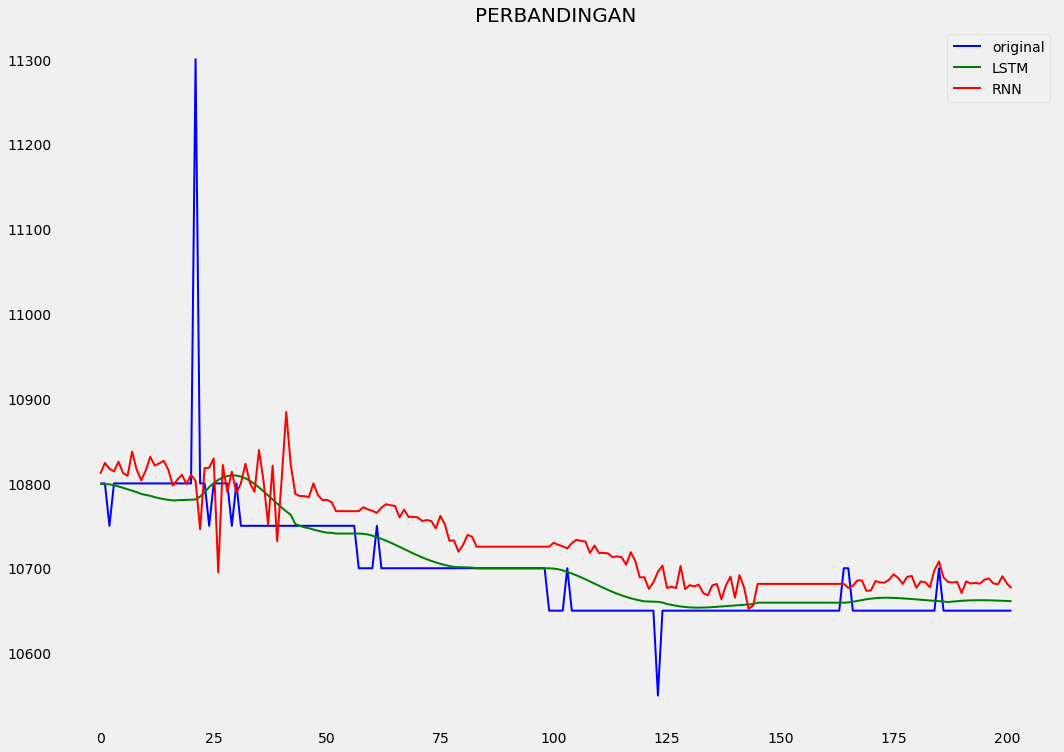

In [ ]:
plt.figure(figsize=(16,12))

plt.plot(test_y, c="blue",linewidth=2, label="original")
plt.plot(lstm_predictions, c="green",linewidth=2, label="LSTM")
plt.plot(rnn_predictions, c="red",linewidth=2, label="RNN")
plt.legend()
plt.title("PERBANDINGAN",fontsize=20)
plt.grid()
plt.show()